## Function transformer:

A `function transformer` in machine learning is a tool that applies a function to data to make it easier for a model to understand. Function transformers are a type of feature transformation technique.

`How it works`

- Function transformers apply a custom function to input data.
- The function can be a simple mathematical function, like a square, log, or reciprocal.
- The function can be designed by someone with domain knowledge of the data.
- The function can be used to make data more normally distributed.


### Types of Function Transformer:

<img src="images/function.png" alt="Image Description" width="750" height="480">

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("Datasets/car data.csv")

In [4]:
df.sample(4)

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
75,76,Ford,2012,3.7,Electric,Manual,14588,New,59421.58,Fiesta
1924,1925,Honda,2013,2.7,Diesel,Automatic,167813,Like New,54110.32,Fit
587,588,Mercedes,2002,2.0,Diesel,Manual,288453,Used,92079.50,E-Class
2429,2430,Toyota,2015,5.4,Electric,Manual,63924,Like New,48533.45,Corolla


In [5]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,[3,6,8]]
y = df.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.sample(4)

,Engine Size,Mileage,Price
2051,2.4,18240,39479.18
1483,1.1,102903,39768.76
2151,1.3,257443,18936.55
86,3.2,250309,43559.34


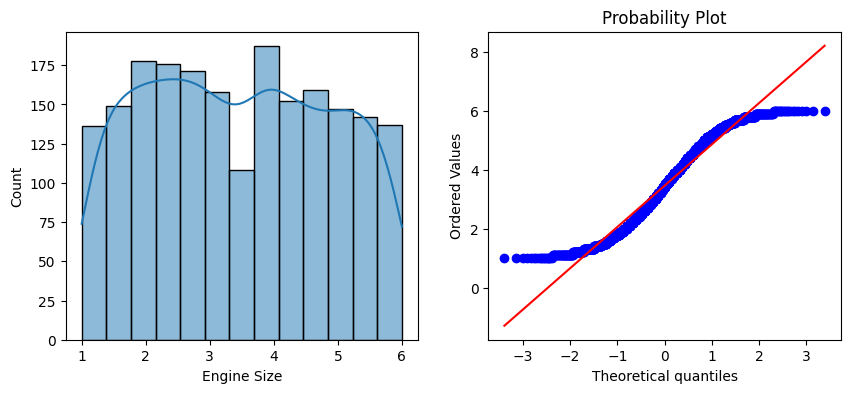

In [ ]:
# Distibution and QQ plot on Engine Size column of data before log transformation.

fig,( ax1,ax2 )= plt.subplots(ncols=2,figsize=(10,4))
sns.histplot(X_train["Engine Size"],kde=True,ax=ax1)
stats.probplot(X_train["Engine Size"],dist='norm',plot=ax2)
plt.show()

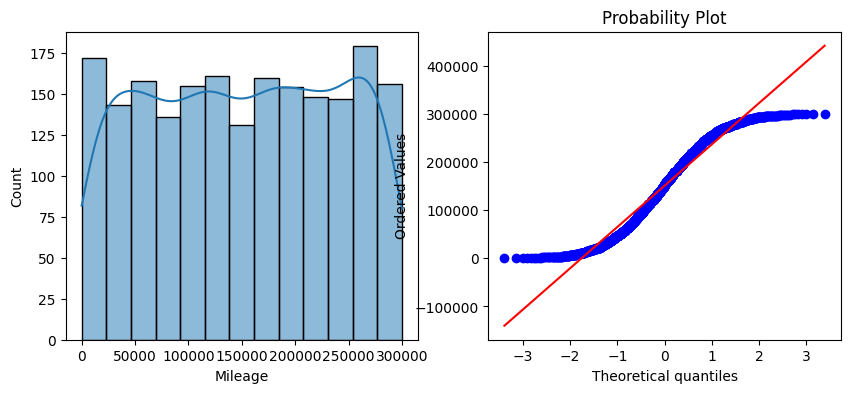

In [25]:
# Distibution and QQ plot on Mileage column of data before log transformation.

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))
sns.histplot(X_train['Mileage'],kde=True,ax=ax1)
stats.probplot(X_train['Mileage'],dist='norm',plot=ax2)
plt.show()

## 1. log Transformer:

In [31]:
from sklearn.preprocessing import FunctionTransformer

ft = FunctionTransformer(np.log1p)

ft.fit(X_train)

new_X_train = ft.transform(X_train)
new_X_test = ft.transform(X_test)

In [32]:
new_X_train

,Engine Size,Mileage,Price
2055,1.481605,11.203706,11.488643
1961,0.955511,12.438116,9.128447
1864,1.916923,11.406264,11.406573
2326,1.722767,12.525740,10.551558
461,1.435085,10.625975,11.260304
...,...,...,...
1638,1.774952,11.142919,11.200180
1095,1.360977,11.756044,11.316179
1130,1.435085,11.297713,11.211887
1294,1.757858,8.754161,9.579007


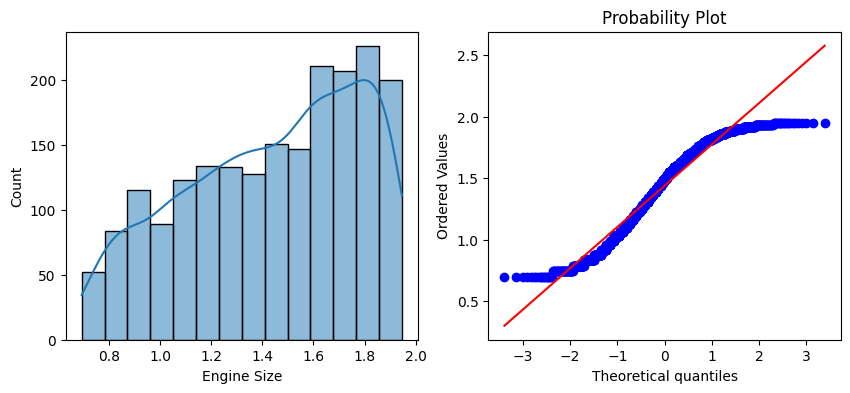

In [33]:
# Distibution and QQ plot on Engine Size column of data After log transformation.

fig,( ax1,ax2 )= plt.subplots(ncols=2,figsize=(10,4))
sns.histplot(new_X_train["Engine Size"],kde=True,ax=ax1)
stats.probplot(new_X_train["Engine Size"],dist='norm',plot=ax2)
plt.show()

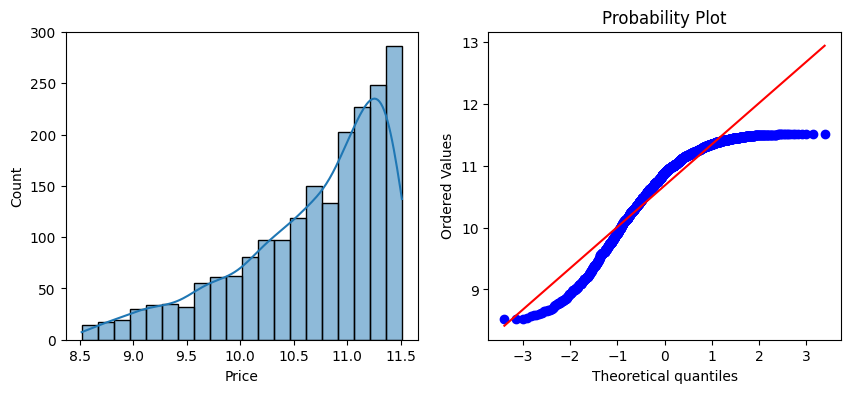

In [34]:
# Distibution and QQ plot on Price column of data after log transformation.

fig,( ax1,ax2 )= plt.subplots(ncols=2,figsize=(10,4))
sns.histplot(new_X_train["Price"],kde=True,ax=ax1)
stats.probplot(new_X_train["Price"],dist='norm',plot=ax2)
plt.show()

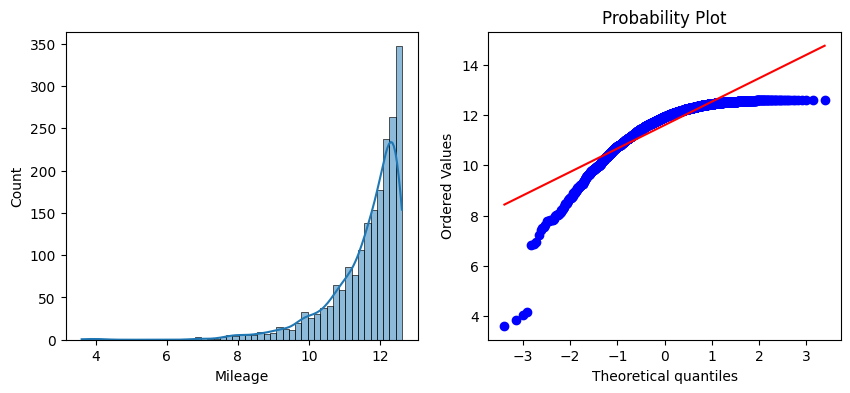

In [ ]:
# Distibution and QQ plot on Mileage column of data after log transformation.

fig,( ax1,ax2 )= plt.subplots(ncols=2,figsize=(10,4))
sns.histplot(new_X_train["Mileage"],kde=True,ax=ax1)
stats.probplot(new_X_train["Mileage"],dist='norm',plot=ax2)
plt.show()

## 2. Reciprocal transformer:

In [37]:
rft = FunctionTransformer(lambda x:1/x)

In [38]:
rft.fit(X_train)

new_X_train_r = rft.transform(X_train)
new_X_test_r = rft.transform(X_test)

In [39]:
new_X_train_r

,Engine Size,Mileage,Price
2055,0.294118,0.000014,0.000010
1961,0.625000,0.000004,0.000109
1864,0.172414,0.000011,0.000011
2326,0.217391,0.000004,0.000026
461,0.312500,0.000024,0.000013
...,...,...,...
1638,0.204082,0.000014,0.000014
1095,0.344828,0.000008,0.000012
1130,0.312500,0.000012,0.000014
1294,0.208333,0.000158,0.000069


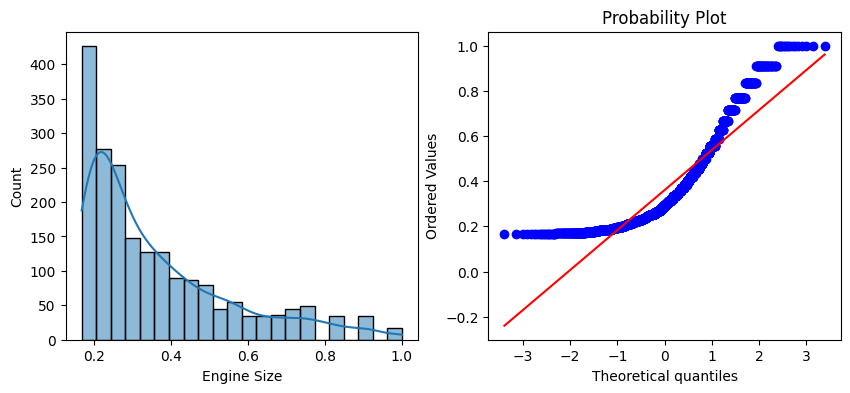

In [ ]:
# Distibution and QQ plot on Engine Size column of data After reciprocal transformation.

fig,( ax1,ax2 )= plt.subplots(ncols=2,figsize=(10,4))
sns.histplot(new_X_train_r["Engine Size"],kde=True,ax=ax1)
stats.probplot(new_X_train_r["Engine Size"],dist='norm',plot=ax2)
plt.show()

# Right skewed.

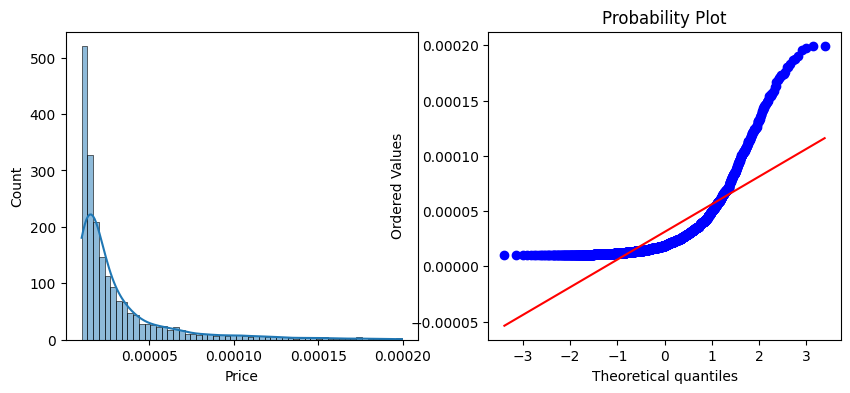

In [42]:
# Distibution and QQ plot on Price column of data After reciprocal transformation.

fig,( ax1,ax2 )= plt.subplots(ncols=2,figsize=(10,4))
sns.histplot(new_X_train_r["Price"],kde=True,ax=ax1)
stats.probplot(new_X_train_r["Price"],dist='norm',plot=ax2)
plt.show()

# Right skewed.